A MODEL WHICH PREDICTS THE PRICES OF HOUSES

LOAD DEPENDENCES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOAD DATASET

In [2]:
housing_dataset = pd.read_csv('Housing.csv') 

VIEW FIRST 5 ROWS ON THE DATASET

In [3]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


DECIPHER MORE INSIGHTS ABOUT THE DATASET

In [4]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

DATASET STATISTICAL DISTRIBUTION

In [6]:
housing_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


CHECK FOR MISSING VALUES

In [7]:
housing_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
housing_dataset.columns[housing_dataset.isnull().mean() > 0]

Index([], dtype='object')

In [9]:
for column in housing_dataset.columns:
    missing_col = 100 * np.mean(housing_dataset[column].isnull())
    print('percentage of missing data on the {} column is : {}'.format(column, missing_col))

percentage of missing data on the price column is : 0.0
percentage of missing data on the area column is : 0.0
percentage of missing data on the bedrooms column is : 0.0
percentage of missing data on the bathrooms column is : 0.0
percentage of missing data on the stories column is : 0.0
percentage of missing data on the mainroad column is : 0.0
percentage of missing data on the guestroom column is : 0.0
percentage of missing data on the basement column is : 0.0
percentage of missing data on the hotwaterheating column is : 0.0
percentage of missing data on the airconditioning column is : 0.0
percentage of missing data on the parking column is : 0.0
percentage of missing data on the prefarea column is : 0.0
percentage of missing data on the furnishingstatus column is : 0.0


VIEW NUMERICAL COLUMNS

In [10]:
numerical_columns = housing_dataset.select_dtypes(include=np.number).columns

In [11]:
numerical_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [12]:
numerical_data = housing_dataset[numerical_columns]

VIEW CATEGORICAL COLUMNS

In [13]:
categrical_columns = list(set(housing_dataset) - set(numerical_columns))

In [14]:
categrical_columns

['airconditioning',
 'mainroad',
 'guestroom',
 'prefarea',
 'basement',
 'hotwaterheating',
 'furnishingstatus']

CHECK FOR UNIFORM DISTRIBUTION ACROSS THE NUMERICAL COLUMNS

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

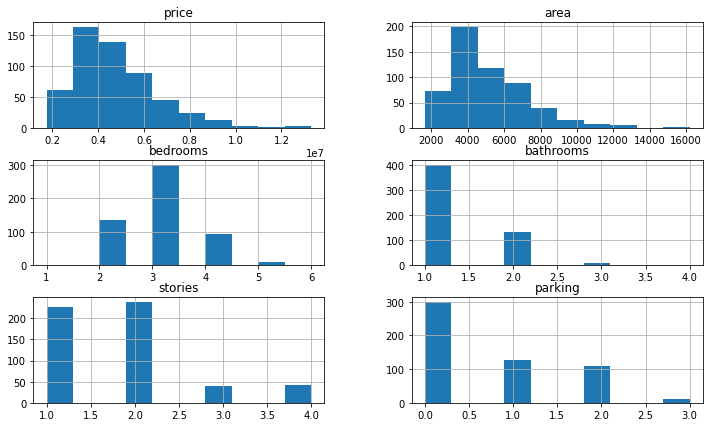

In [15]:
housing_dataset[numerical_columns].hist(bins=10,figsize=(12,7))

PRICE AND AREA ARE SCEWED RIGHT DUE TO LOWER BOUND DISTRIBUTION COMPARED TO THE ELEMENTS OF THE DATASET

ESTABLISH EXISTING CORRELATION BETWEEN THE NUMERIC VALUES

In [16]:
housing_dataset[numerical_columns].corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


VISUALIZE EXISTING CORRELATION BETWEEN THE FEATURES OF NUMERIC DATA

<AxesSubplot:>

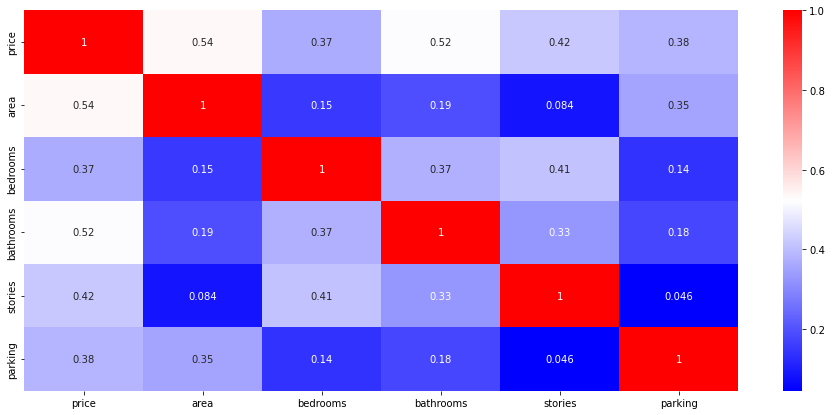

In [17]:
plt.figure(figsize=(16,7))
sns.heatmap(housing_dataset.corr(),cmap='bwr',annot=True)

OBVIOUSLY, THE HIGHEST CORRELATION EXISTS BETWEEN PRICE AND THE AREA

OBSERVE EXISTING DISTRIBUTION ON THE "furnishingstatus" FEATURE

In [18]:
housing_dataset['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

VISUALIZE DISTRBUTION ACCROSS DATASET

In [19]:
# pip install plotly

In [20]:
from sklearn.decomposition import PCA
import plotly.express as px

In [21]:
# # Dimensionality reduction to 3 dimensions
# pca = PCA(n_components=3) 
# housing_dataset_pca = pca.fit_transform(housing_dataset[numerical_columns].iloc[:, :-1])

# # 3D scatterplot
# fig = px.scatter_3d(x=housing_dataset_pca[:, 0],
#                     y=housing_dataset_pca[:, 1], 
#                     z=housing_dataset_pca[:, 2],
#                     color=housing_dataset.iloc[:, -1])
# fig.show()

In [22]:
housing_dataset.shape

(545, 13)

In [23]:
# Find mean, standard deviation and cut off value 
mean = housing_dataset["area"].mean()
std = housing_dataset["area"].std()
cutoff = 3 * std

# Define lower and upper boundaries
lower, upper = mean-cutoff, mean+cutoff

# Define new dataset by masking upper and lower boundaries
new_housing_data = housing_dataset[(housing_dataset["area"] > lower) & (housing_dataset["area"] < upper)]

In [24]:
new_housing_data.shape

(538, 13)

In [25]:
housing_dataset[numerical_columns]

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [26]:
# sns.pairplot(housing_dataset, diag_kws={"color":"red"})

VISUALIZE THE DISTRIUTION ON THE 'furnishingstatus' FEATURE OF THE DATASET

<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

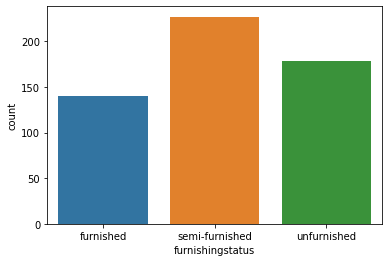

In [27]:
sns.countplot(housing_dataset['furnishingstatus'])

VISUALIZE THE DISTRIBUTIION OF CATEGORICAL FEATURES

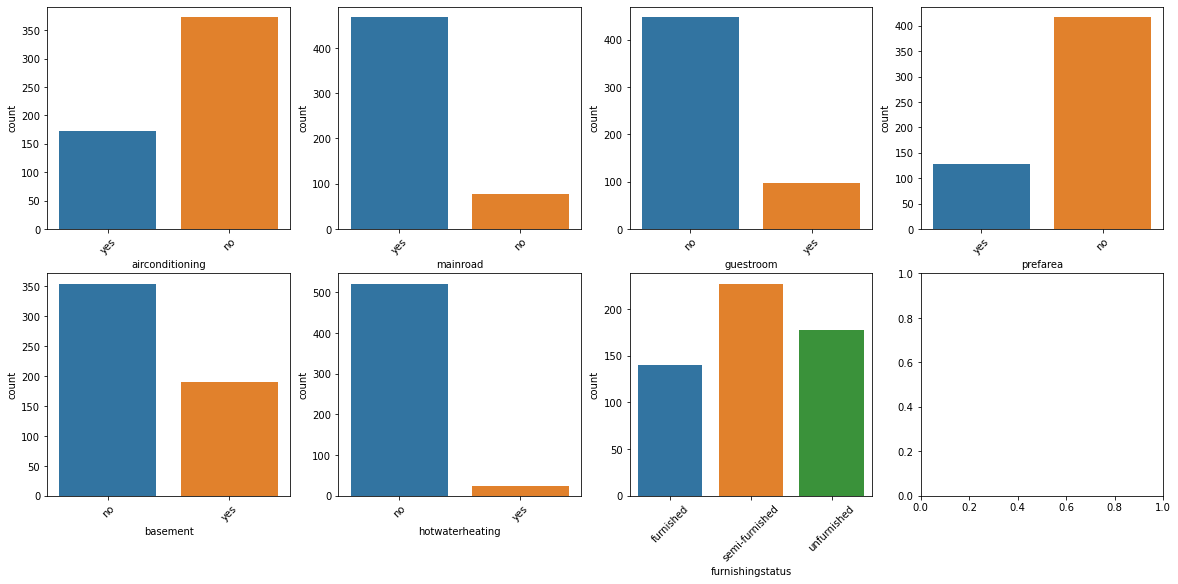

In [28]:
fig,ax = plt.subplots(2,4,figsize=(20,9))
for category, subplot in zip(categrical_columns,ax.flatten()):
    sns.countplot(housing_dataset[category],ax= subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

ANALYZING THE RELATIONSHIP BETWEEN PRICE AND CATGORICAL VARIABLES

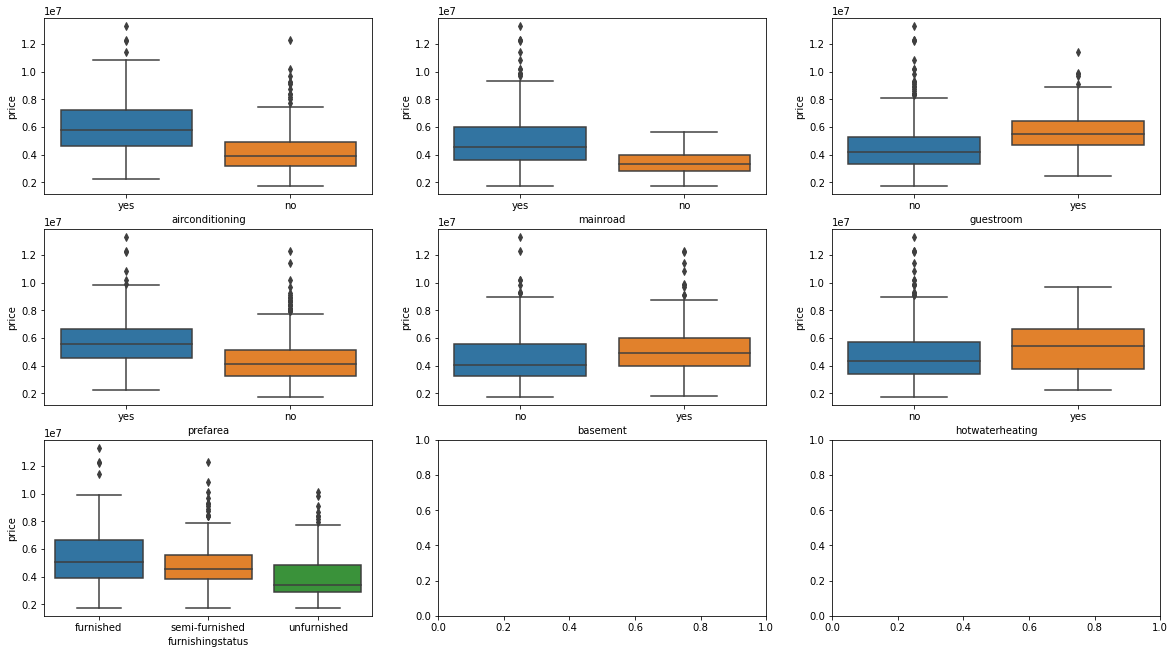

In [29]:
fig,ax = plt.subplots(3,3,figsize=(20,11))
for category, subplot in zip(categrical_columns,ax.flatten()):
    sns.boxplot(x=category, y='price',data=housing_dataset,ax=subplot)

THE ABOVE VISUALIZATION SHOWS A NUMBER OF FACTORS WHICH BRING ABOUT AN INCREASE IN PRICE, SUCH AS:
    COMPLETELY FURNISHED APPARTMENTS,
    AVAILABILITY OF AIR CONDITIONING
    AVAILABILITY OF GUEST ROOM
    HOUSES CITED AT RESERVED AREAS
    NEARNESS TO MAINROAD
    AVAILABILITY OF BASEMENT
    AVAILABILITY OF HOT WATER HEATER

CLOSELY EXAMINE THE RELATIONSHIP BETWEEN "furnishingstatus" AND PRICE

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

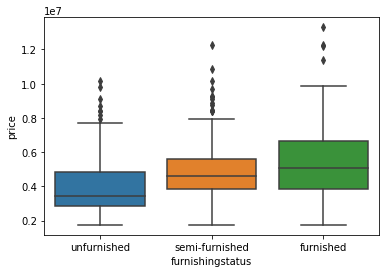

In [30]:
sorted_furnishes = housing_dataset.groupby(['furnishingstatus'])['price'].median().sort_values()
sns.boxplot(x=housing_dataset['furnishingstatus'],y=housing_dataset['price'],order=list(sorted_furnishes.index))

CONVERT "furnishingstatus" FEATURES INTO NUMERIC DATA USING ONE-HOT-ENCODING

In [31]:
dummy_data = pd.get_dummies(housing_dataset['furnishingstatus'],prefix_sep='_',drop_first=False)

In [32]:
dataset = pd.concat([housing_dataset,dummy_data],axis=1)

In [33]:
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,0


DROP "furnishingstatus" COLUMNS

CONVERT OTHER CATEGORICAL FEATURES INTO NUMERIC SETS OF DATA

In [34]:
dataset = dataset.drop('furnishingstatus',axis=1)

In [35]:
dataset['mainroad'] = dataset['mainroad'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['guestroom'] = dataset['guestroom'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['basement'] = dataset['basement'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['hotwaterheating'] = dataset['hotwaterheating'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['airconditioning'] = dataset['airconditioning'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['prefarea'] = dataset['prefarea'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['hotwaterheating'] = dataset['hotwaterheating'].apply(lambda x : 1 if x == 'yes' else 0)

VIEW MODELLING - READY DATA

In [36]:
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0


DISTRIBUTE DATA INTO TRAINING AND TEST SET

In [37]:
train_data = numerical_data.drop('price',axis=1)

In [38]:
train_data.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [39]:
test_data = numerical_data['price']

GET TRAINING DATASET ON EVEN TERMS THROUGH SCALING

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scalar = StandardScaler()

In [42]:
train_data = scalar.fit_transform(train_data)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_data,test_data,test_size=0.2,random_state=123)

VERIFY EQUALITY DISTRIBUTION OF TRAINING AND TEST DATASET

In [45]:
X_train.shape

(436, 5)

In [46]:
y_train.shape

(436,)

In [47]:
X_test.shape

(109, 5)

In [48]:
y_test.shape

(109,)

IMPORT LINEAR REGRESSION MODEL

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear_reg_model = LinearRegression()

In [51]:
linear_reg_model.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = linear_reg_model.predict(X_test) 

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
r2_score(y_train,linear_reg_model.predict(X_train))

0.5505177933074399

In [55]:
r2_score(y_test,linear_reg_model.predict(X_test))

0.5987282439668726

PERFORM HYPERPARAMETER TUNING TO DETERMINE THE OPTIMAL VALUE OF THE FOLLOWING MODELS: Lasso Regression, Ridge Reression
and DecisioTreeRegressor

In [56]:
from sklearn.model_selection import ShuffleSplit

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.linear_model import Lasso

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
from sklearn.linear_model import Ridge

COMPARE A FEW MODELS:

In [62]:
def compare_models(training_dataset,test_dataset):
    algorithms = {
        'ridge' : {
            'model' : Ridge(),
            'params' : {
                'alpha' : [50],
                'max_iter' :[100],
                'tol' : [0.1]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random'],
                'max_depth' : [3,4,5,6,7,8,9,10,1112,13,14,15,16,17,18,19,20],
                'min_samples_split' : [3]
            }
        }
    }
    scores = []
    # CONDUCT RANDOM PERMUTATION CROSS VALIDATOR
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo, config in algorithms.items():
        grid_search = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        grid_search.fit(training_dataset,test_dataset)
        scores.append({
            'model': algo,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
compare_models(train_data,test_data)

,model,best_score,best_params
0,ridge,0.537496,"{'alpha': 50, 'max_iter': 100, 'tol': 0.1}"
1,lasso,0.533326,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.430626,"{'criterion': 'friedman_mse', 'max_depth': 8, ..."


Explore ridge regression as it show some significant best_sore value

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge.fit(X_train,y_train)

r2_score(y_train,ridge.predict(X_train))

0.5477359893308724

In [64]:
r2_score(y_test,ridge.predict(X_test))

0.5977005220354842

Possible overfitting demands exploring lasso regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso_model = Lasso(alpha=2,selection='cyclic')

In [67]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=2)

In [68]:
lasso_pred = lasso_model.predict(X_test)

In [69]:
r2_score(y_train,lasso_model.predict(X_train))

0.5505177933035666

In [70]:
r2_score(y_test,lasso_model.predict(X_test))

0.598728158143188

In [71]:
numerical_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

FOR IMPROVED PERFORMANCE, WE SUPPLY THE MODEL MORE INFORMATION AS REGARDS THE MOST RECENT VALUATION OF HOUSE PRICES BASED ON KEY FEATURES SUCH AS NUMBER OF BEDREOOMS,STORIES & AREA

In [72]:
sample_data = numerical_data.rolling(50,min_periods=1).mean()
sample_ratios = [p + '_price' for p in numerical_columns]
numerical_data[sample_ratios] = numerical_data[numerical_columns] / sample_data[numerical_columns]
numerical_data.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
parking            0
price_price        0
area_price         0
bedrooms_price     0
bathrooms_price    0
stories_price      0
parking_price      0
dtype: int64

SELECT RELEVANT COLUMNS FOR TRAINING

In [73]:
new_columns = ['price','area','bedrooms','bathrooms','stories','parking','area_price','bedrooms_price','stories_price']

In [74]:
new_data = numerical_data[new_columns]

In [75]:
new_training_data = new_data.drop('price',axis=1)

In [76]:
new_testing_data = new_data['price']

In [77]:
scaled_training_data = scalar.fit_transform(new_training_data)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(scaled_training_data, new_testing_data, test_size=0.2, random_state=42)

In [79]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=2)

In [80]:
r2_score(y_train,lasso_model.predict(X_train))

0.9028269288774605

In [81]:
r2_score(y_test,lasso_model.predict(X_test))

0.8978821733851102

Model seems to perform better on the traning set that the test set - This suggests a possible fitting of outliers on the training dataset

REMOVE OUTLIERS IN THE FOLLOWING STEPS:
1. Find Q1(first quartile), Q3(third quartile), IQR(inter-quarile range) and cut off value,
2. Define lower and upper boundaries,
3. Define new dataset by masking upper and lower boundaries.

In [82]:
q25, q75 = np.quantile(new_data["area"], 0.25), np.quantile(new_data["area"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["area"] > lower) & (new_data["area"] < upper)]
new_data.shape

(530, 9)

In [83]:
q25, q75 = np.quantile(new_data["bedrooms"], 0.25), np.quantile(new_data["bedrooms"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["bedrooms"] > lower) & (new_data["bedrooms"] < upper)]
new_data.shape

(519, 9)

In [84]:
q25, q75 = np.quantile(new_data["bathrooms"], 0.25), np.quantile(new_data["bathrooms"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["bathrooms"] > lower) & (new_data["bathrooms"] < upper)]
new_data.shape

(518, 9)

In [85]:
q25, q75 = np.quantile(new_data["stories"], 0.25), np.quantile(new_data["stories"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["stories"] > lower) & (new_data["stories"] < upper)]
new_data.shape

(478, 9)

In [86]:
q25, q75 = np.quantile(new_data["parking"], 0.25), np.quantile(new_data["parking"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["parking"] > lower) & (new_data["parking"] < upper)]
new_data.shape

(469, 9)

In [87]:
q25, q75 = np.quantile(new_data["area_price"], 0.25), np.quantile(new_data["area_price"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["area_price"] > lower) & (new_data["area_price"] < upper)]
new_data.shape

(448, 9)

In [88]:
q25, q75 = np.quantile(new_data["bedrooms_price"], 0.25), np.quantile(new_data["bedrooms_price"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["bedrooms_price"] > lower) & (new_data["bedrooms_price"] < upper)]
new_data.shape

(448, 9)

In [89]:
q25, q75 = np.quantile(new_data["stories_price"], 0.25), np.quantile(new_data["stories_price"], 0.75)
iqr = q75 - q25
cutoff = 1.5 * iqr

lower, upper = q25 - cutoff, q75 + cutoff

new_data = new_data[(new_data["stories_price"] > lower) & (new_data["stories_price"] < upper)]
new_data.shape

(447, 9)

In [90]:
improved_data = new_data.copy()

In [91]:
new_train_dataset = improved_data.drop('price',axis=1)

In [92]:
new_test_dataset = improved_data['price']

In [93]:
scaled_t_data = scalar.fit_transform(new_train_dataset)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(scaled_t_data, new_test_dataset, test_size=0.2, random_state=42)

In [95]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=2)

In [96]:
r2_score(y_train,lasso_model.predict(X_train))

0.9040459961165694

In [97]:
r2_score(y_test,lasso_model.predict(X_test))

0.9049823280068374

LASSO REGRESSION ULTIMATELY PERFORMS BETTER IN PREDICTING THE PRICES OF HOUSES